In [0]:
# update pytorch and fastai to latest versions
!pip install torch -U
!pip install torchvision -U
!pip install fastai -U 
!pip install kaggle

In [0]:
# import libraries
import pandas as pd
pd.options.display.max_columns = None
import numpy as np
import random
import os

# Matplotlib
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [70]:
# mount your google drive so you can save to it
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [71]:
os.getcwd()

'/content/gdrive/My Drive/projects/blindness_detection'

In [0]:
#os.mkdir('blindness_detection')

In [0]:
os.chdir('/content/gdrive/My Drive/projects/')

In [74]:
os.getcwd()

'/content/gdrive/My Drive/projects'

In [75]:
os.listdir()

['blindness_detection']

In [0]:
# create environment variables for kaggle to authenticate with
# os.environ['KAGGLE_USERNAME'] = "insert-here"
# os.environ['KAGGLE_KEY'] = "insert-here"

In [0]:
#!kaggle competitions download -c aptos2019-blindness-detection -p 'blindness_detection'

In [81]:
os.listdir('blindness_detection/')

['train.csv',
 'test.csv',
 'sample_submission.csv',
 'images_train',
 'images_test',
 'train_images',
 'test_images']

In [0]:
#!unzip 'blindness_detection/train_images.zip' -d 'train_images'
#!unzip 'blindness_detection/test_images.zip' -d 'test_images'

In [0]:
os.chdir('blindness_detection/')

In [85]:
from pathlib import Path

#create path variable to primary directory
path = Path(os.getcwd())
path

PosixPath('/content/gdrive/My Drive/projects/blindness_detection')

In [0]:
# make a dataframe from train.csv
train_df = pd.read_csv(path/'train.csv')
# make a dataframe from test.csv
test_df = pd.read_csv(path/'test.csv')

In [87]:
train_df.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [88]:
test_df.head()

,id_code
0,0005cfc8afb6
1,003f0afdcd15
2,006efc72b638
3,00836aaacf06
4,009245722fa4


In [0]:
# create a dictionary for the varying levels of diabetic retinopathy
dr_dict = {0: 'No DR', # no diabetic retinopathy,
           1: 'Mild', # mild case of diabetic retinopathy,
           2: 'Moderate', # moderate level of diabetic retinopathy
           3: 'Severe', # severe case of diabetic retinopathy
           4: 'Proliferative DR' # worst case scenario
          }

In [0]:
# create target column that generates more descriptive labels vs. integer values
train_df['target'] = train_df['diagnosis'].map(dr_dict)

In [91]:
train_df.tail()

,id_code,diagnosis,target
3657,ffa47f6a7bf4,2,Moderate
3658,ffc04fed30e6,0,No DR
3659,ffcf7b45f213,2,Moderate
3660,ffd97f8cd5aa,0,No DR
3661,ffec9a18a3ce,2,Moderate


In [92]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3662 entries, 0 to 3661
Data columns (total 3 columns):
id_code      3662 non-null object
diagnosis    3662 non-null int64
target       3662 non-null object
dtypes: int64(1), object(2)
memory usage: 85.9+ KB


In [0]:
# convert target column to categorical type
train_df['target'] = train_df['target'].astype('category')

In [0]:
# drop diagnosis column
train_df.drop(labels='diagnosis', axis=1, inplace=True)

In [95]:
train_df.head()

,id_code,target
0,000c1434d8d7,Moderate
1,001639a390f0,Proliferative DR
2,0024cdab0c1e,Mild
3,002c21358ce6,No DR
4,005b95c28852,No DR


In [96]:
os.listdir()

['train.csv',
 'test.csv',
 'sample_submission.csv',
 'images_train',
 'images_test']

In [99]:
train_images_path = path/'images_train'
train_images_path

PosixPath('/content/gdrive/My Drive/projects/blindness_detection/images_train')

In [0]:
# import deep learning libraries
import torch
import fastai
from fastai import *
from fastai.vision import *

# create ImageList from train_df
data = (ImageDataBunch.from_df(path=path/'images_train',
                              df=train_df,
                              suffix='.png',
                              size=64,
                              bs=32)
       )

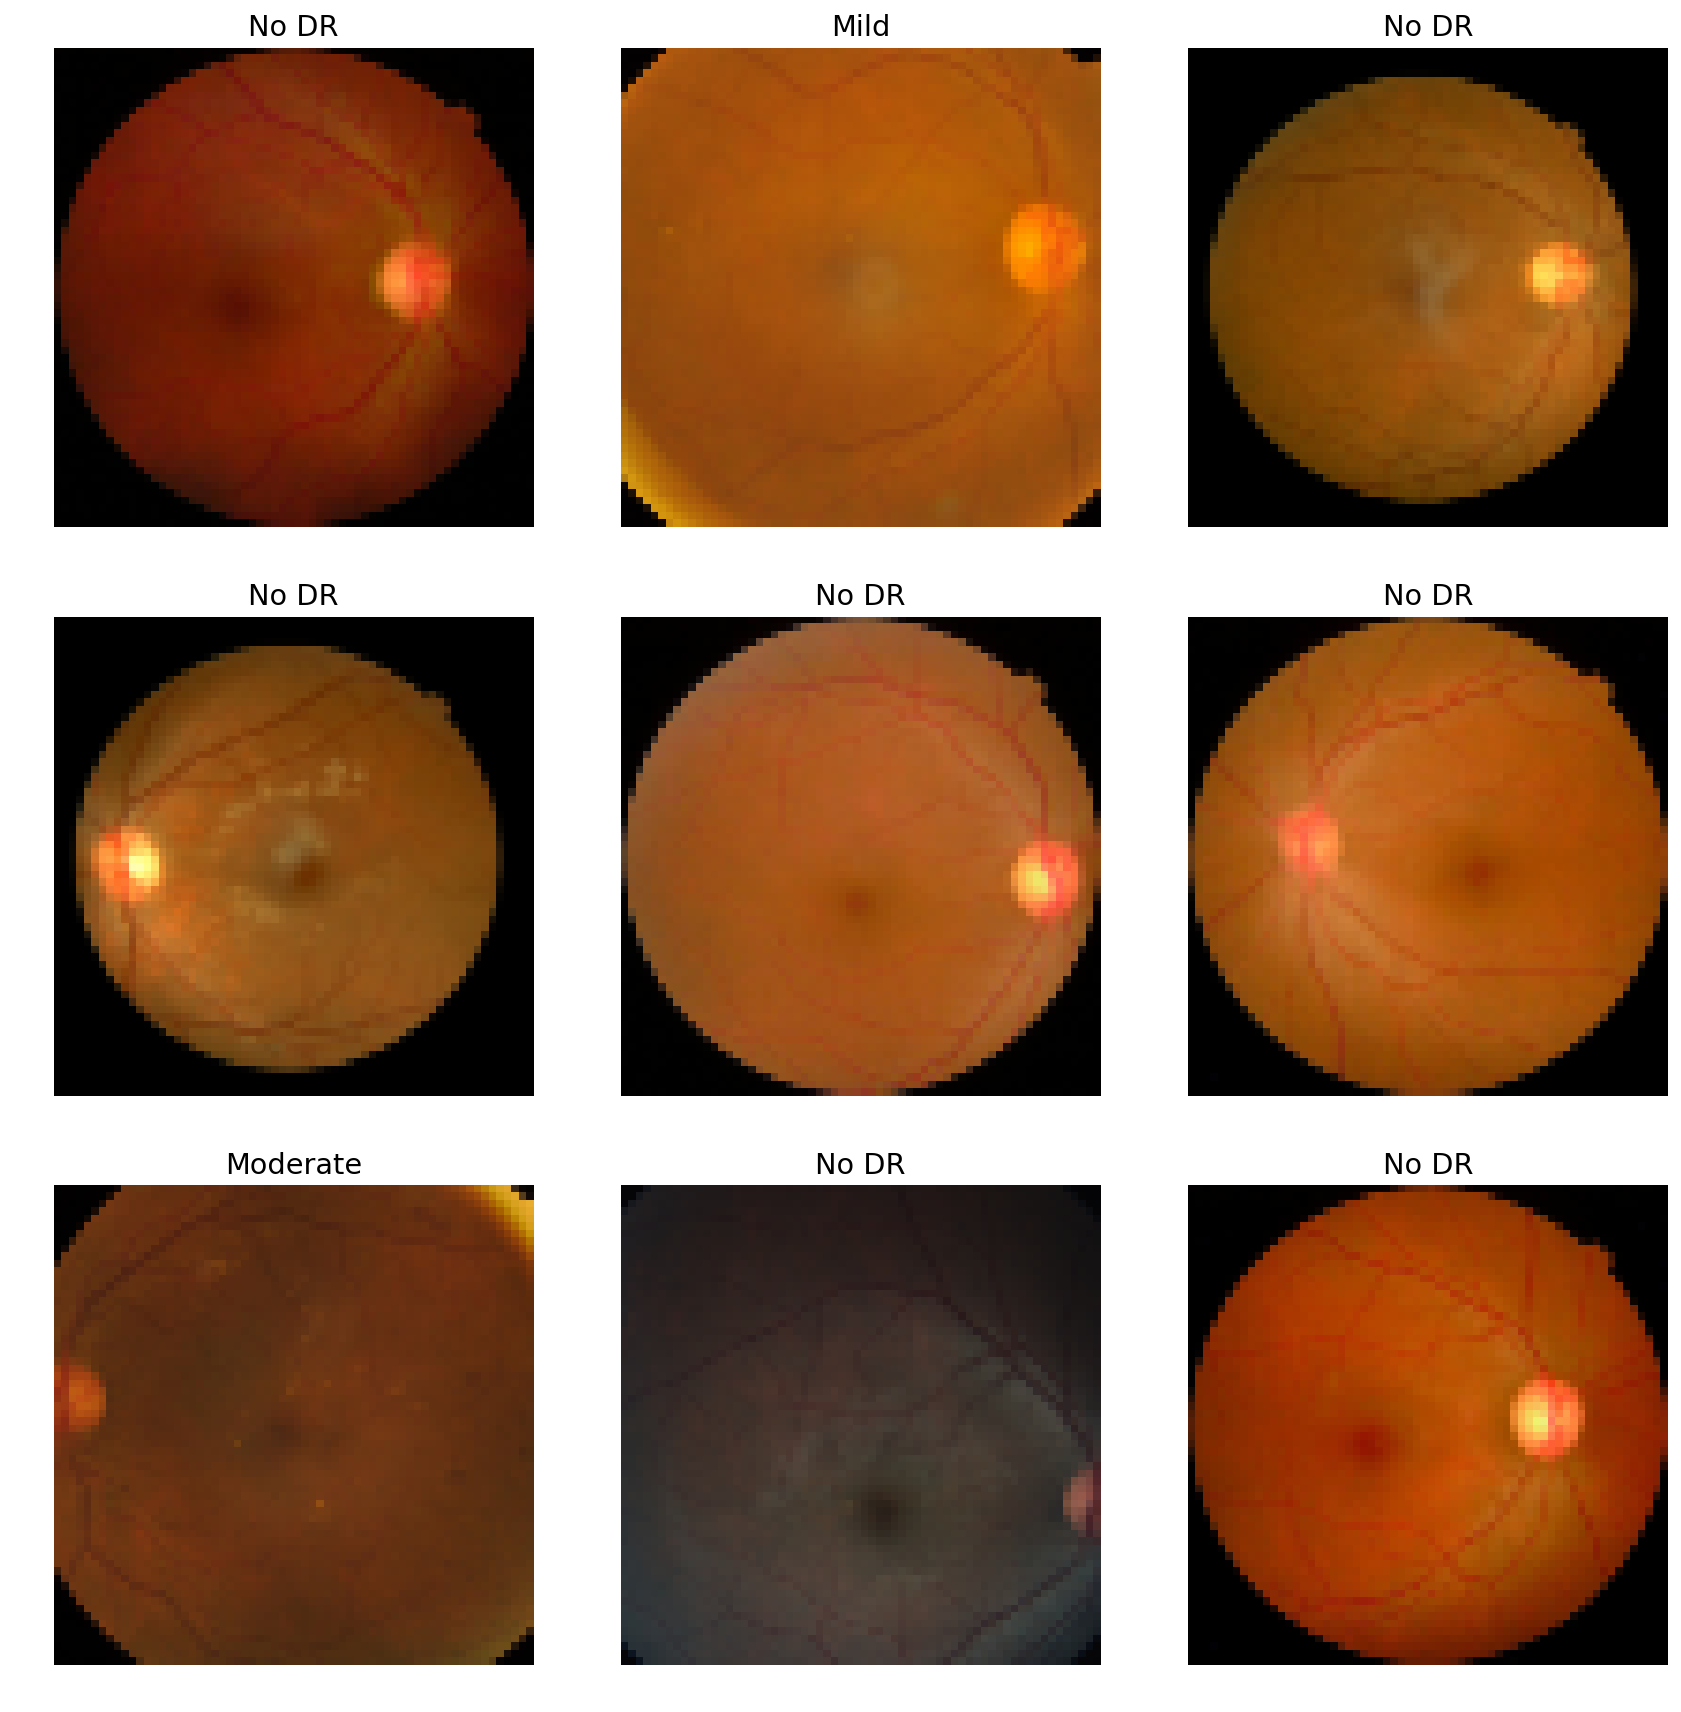

In [114]:
data.show_batch(rows=3)

In [115]:
os.listdir()

['train.csv',
 'test.csv',
 'sample_submission.csv',
 'images_train',
 'images_test',
 'models']

In [116]:
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (2930 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
Moderate,Mild,No DR,No DR,Proliferative DR
Path: /content/gdrive/My Drive/projects/blindness_detection/images_train;

Valid: LabelList (732 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
No DR,Moderate,Mild,No DR,Moderate
Path: /content/gdrive/My Drive/projects/blindness_detection/images_train;

Test: None

In [0]:
# add test set
data.add_test(ImageList.from_df(test_df, path = path/'images_test', suffix='.png'))

In [118]:
data

ImageDataBunch;

Train: LabelList (2930 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
Moderate,Mild,No DR,No DR,Proliferative DR
Path: /content/gdrive/My Drive/projects/blindness_detection/images_train;

Valid: LabelList (732 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
No DR,Moderate,Mild,No DR,Moderate
Path: /content/gdrive/My Drive/projects/blindness_detection/images_train;

Test: LabelList (1928 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: EmptyLabelList
,,,,
Path: /content/gdrive/My Drive/projects/blindness_detection/images_train

# Create Learner and Model Training

In [119]:
path

PosixPath('/content/gdrive/My Drive/projects/blindness_detection')

In [0]:
learn = cnn_learner(data, models.resnet50,
                    metrics=[error_rate, Recall(), Precision()],
                    pretrained=True,
                    bn_final=True,
                    path=path/'models'
                   )

In [128]:
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

In [129]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 2.75E-04
Min loss divided by 10: 1.58E-01


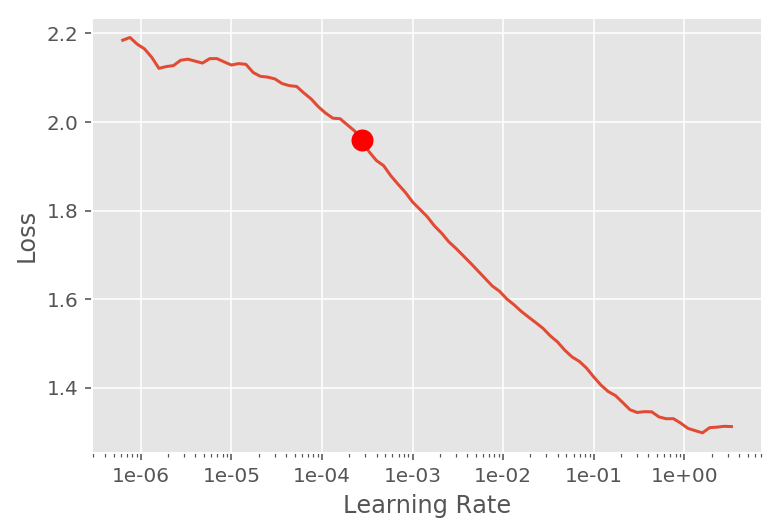

In [130]:
learn.recorder.plot(suggestion=True)

In [131]:
# set learning rate
lr = learn.recorder.min_grad_lr
lr

0.0002754228703338166

In [132]:
from fastai.callbacks import SaveModelCallback

learn.fit_one_cycle(5, lr,
                   callbacks=[SaveModelCallback(learn, every='improvement', monitor='recall', 
                                               name='trial1-rd1')])

epoch,train_loss,valid_loss,error_rate,recall,precision,time
0,1.414288,1.118508,0.433060,0.404940,0.393627,07:25
1,1.126208,0.978650,0.348361,0.490582,0.471696,07:27
2,1.013420,0.945680,0.319672,0.520248,0.497910,07:27
3,0.945216,0.968091,0.308743,0.537234,0.510247,07:24
4,0.915838,1.001469,0.334699,0.496979,0.471369,07:23


/usr/local/lib/python3.6/dist-packages/fastai/metrics.py:189: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")


Better model found at epoch 0 with recall value: 0.40494033694267273.
Better model found at epoch 1 with recall value: 0.4905817210674286.
Better model found at epoch 2 with recall value: 0.5202482342720032.
Better model found at epoch 3 with recall value: 0.5372337102890015.
